# MLP -- demo

# Understanding the training loop 

In this demo a three layer dense net is trained on the MNIST dataset using the PyTorch framework

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


### Download the data

In [7]:

import torchvision.datasets
import torchvision.transforms as transforms

# Apply transformations to the data points before passing them to the network
transform = transforms.Compose([transforms.ToTensor(),  # Transform the data to torch tensors of shape (28, 28, 1), corresponding to 28 * 28 pixels with 1 channel (1 value per pixel that is)
                                transforms.Lambda(lambda x: x.squeeze()),  # Squeeze the data to remove the redundant channel dimension (to obtain tensors of shape (28, 28))
                                ])

# Download the MNIST train dataset (used to train the network)
trainset = torchvision.datasets.MNIST(root='./data_mnist',
                                      train=True,
                                      download=True,
                                      transform=transform  # Apply the defined transformation on the data
                                      )

# Download the MNIST test dataset (used to evaluate the trained network)
testset = torchvision.datasets.MNIST(root='./data_mnist',
                                     train=False,
                                     download=True,
                                     transform=transform
                                     )


Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data_mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./data_mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data_mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./data_mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data_mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data_mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data_mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data_mnist/MNIST/raw



In [11]:
print(trainset.data.size())
print(testset.data.size())
print(trainset.data.dim())

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])
3


### Make a three layer net class

In [12]:
class ThreeLayerNet(nn.Module):

    def __init__(self, input_size, hidden_size1, hidden_size2,  output_size):
        super(ThreeLayerNet , self).__init__()
        
        self.layer1 = nn.Linear(input_size, hidden_size1, bias=False)
        self.layer2 = nn.Linear(hidden_size1, hidden_size2, bias=False)
        self.layer3 = nn.Linear(hidden_size2, output_size, bias=False)
        
    def forward(self, x):
        y       = self.layer1(x)
        y_hat   = F.relu(y)
        z       = self.layer2(y_hat)
        z_hat   = F.relu(z)
        scores  = self.layer3(z_hat)
        return scores


### Build the net

In [13]:
net=ThreeLayerNet(784, 50, 50, 10)
print(net)

ThreeLayerNet(
  (layer1): Linear(in_features=784, out_features=50, bias=False)
  (layer2): Linear(in_features=50, out_features=50, bias=False)
  (layer3): Linear(in_features=50, out_features=10, bias=False)
)


### Choose the criterion, optimizer, learning rate, and batch size

In [14]:
criterion = nn.CrossEntropyLoss()

optimizer=torch.optim.SGD(net.parameters() , lr=0.01)

bs=128

### Create DataLoaders that sample data from the dataset





In [15]:
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=bs,
                                          shuffle=True,  # Shuffle the dataset for random ordering of train samples
                                          drop_last=True
                                          )

testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=bs,
                                         shuffle=True,
                                         drop_last=True
                                         )

### Train the network on the train set (one epoch)

In [16]:

for epoch in range(1, 5):

  for i, (minibatch_data, minibatch_label) in enumerate(trainloader):

      # Set dL/dU, dL/dV, dL/dW to be filled with zeros
      optimizer.zero_grad()
      
      #reshape the minibatch
      inputs = minibatch_data.view(bs, 784)

      # forward the minibatch through the net  
      prob=net(inputs) 
      
      # Compute the average of the losses of the data points in the minibatch
      loss = criterion(prob , minibatch_label) 
      
      # backward pass to compute dL/dU, dL/dV and dL/dW    
      loss.backward()
      
      # do one step of stochastic gradient descent: U=U-lr(dL/dU), V=V-lr(dL/dU), ...
      optimizer.step()
      


### Choose image at random from the test set and see how good/bad are the predictions

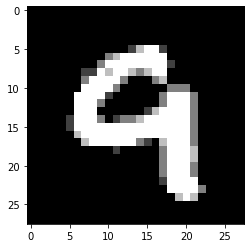

Confidence scores:
0: 0.0003781844861805439
1: 1.0242569459251172e-07
2: 0.009864534251391888
3: 8.871965837897733e-05
4: 0.6212999820709229
5: 0.0009040170698426664
6: 0.008610682561993599
7: 0.0028362644370645285
8: 0.01692679338157177
9: 0.3390906751155853

Label with highest confidence score: 4


In [17]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# choose a picture at random
im_minibatch, label_minibatch = iter(testloader).next()
im, label = im_minibatch[0], label_minibatch[0]

# Function to show an image tensor
def show(X):
    if X.dim() == 3 and X.size(2) == 3:
        plt.imshow(X.numpy())
        plt.show()
    elif X.dim() == 2:
        plt.imshow(   X.numpy() , cmap='gray'  )
        plt.show()
    else:
        print('WRONG TENSOR SIZE')

# diplay the picture
show(im)

# feed it to the net and display the confidence scores
prob = F.softmax(net(im.view(1,784)) , dim=1)

print('Confidence scores:\n' + '\n'.join(['{}: {}'.format(i, p.item()) for i, p in enumerate(prob.squeeze())]))

print('\nLabel with highest confidence score: {}'.format(torch.argmax(prob).item()))
